In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline
import sys
sys.path.append('../')
from package_global_functions import *

extSSDpath = getExternalSSDpath()
if os.path.exists(extSSDpath):
    path = extSSDpath + getProjectFoldername() + '/det_sols_from_polynomial/res_files'
else:
    path = '/res_files'

In [2]:
def latexFont(size= 15, labelsize=18, titlesize=20, ticklabelssize=15, legendsize = 18):
    plt.rcParams.update({
        "text.usetex": True})
    plt.rcParams["text.latex.preamble"].join([
        r"\usepackage{underscore}"
    ])
    plt.rcParams["font.family"] = 'STIXGeneral'
    plt.rc('font', size=size)          # controls default text sizes
    plt.rc('axes', titlesize=titlesize)     # fontsize of the axes title
    plt.rc('axes', labelsize=labelsize)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=ticklabelssize)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=ticklabelssize)    # fontsize of the tick labels
    plt.rc('legend', fontsize=legendsize)    # legend fontsize
    plt.rc('figure', titlesize=titlesize)  # fontsize of the figure title

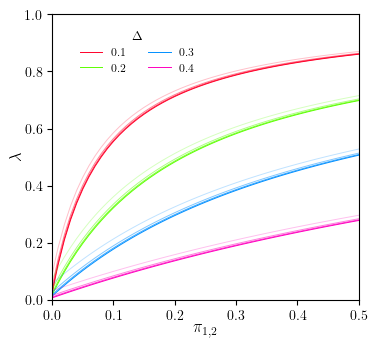

In [3]:
# old delta
# q_pairs_Delta = {
#     0.053:[(9,10), (18,20), (27,30), (36,40)],
#     0.111:[(8,10), (16,20), (24,30), (32,40)],
#     0.176:[(7,10), (14,20), (21,30), (28,40)],
#     0.250:[(6,10), (12,20), (18,30), (24,40)]}

# new delta:
q_pairs_Delta = {
    0.1:[(9,10), (18,20), (27,30), (36,40)],
    0.2:[(8,10), (16,20), (24,30), (32,40)],
    0.3:[(7,10), (14,20), (21,30), (28,40)],
    0.4:[(6,10), (12,20), (18,30), (24,40)]}

Deltas = q_pairs_Delta.keys()
x = 2

latexFont(ticklabelssize=10, labelsize=12, legendsize=8)
fig, ax = plt.subplots(1,1,figsize=(3.7,3.4))
colors = plt.cm.gist_rainbow(np.linspace(0,1,len(Deltas)))
for Delta, color in zip(Deltas, colors):
    for i,q_pair in enumerate(q_pairs_Delta[Delta]):
        tline = pd.read_csv(f'{path}/Tline_sym_pis_q1_{float(q_pair[0])}_q2_{float(q_pair[1])}_f2_{int(x)}f1.csv')
        if i == len(q_pairs_Delta[Delta])-1:
            # ax.plot(tline['pi'], tline['lambda'], color=color, label=f'{q_pairs_Delta[Delta][0]}', alpha=(i+1)/len(q_pairs_Delta[Delta]), lw=0.7)
            ax.plot(tline['pi'], tline['lambda'], color=color, label=f'{Delta}', alpha=(i+1)/len(q_pairs_Delta[Delta]), lw=0.7)
        else:
            ax.plot(tline['pi'], tline['lambda'], color=color, alpha=(i+1)/len(q_pairs_Delta[Delta]), lw=0.7)

ax.set(xlabel='$\pi_{1,2}$', ylabel='$\lambda$', xlim=(0,0.5), ylim=(0,1))
ax.set_xlabel('$\pi_{1,2}$', labelpad=0.02)
ax.set_ylabel(ylabel='$\lambda$', labelpad=0.02)
fig.legend(fontsize=8, loc=(0.2,0.775), title=r'$\Delta$', title_fontsize=9, ncol=2, frameon=False)
fig.tight_layout(pad=0.3)
fig.savefig('webers_law_sym.pdf')
plt.show(fig)

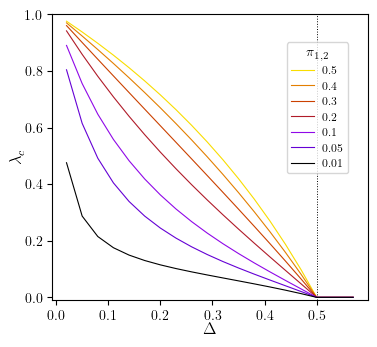

In [4]:
latexFont(ticklabelssize=10, labelsize=12, legendsize=8)
fig, ax = plt.subplots(1,1,figsize=(3.7,3.4))
pis = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
colors = list(plt.cm.gnuplot(np.linspace(0,0.95,len(pis))))
x = 2
q1s, q2 = [4.3,4.6]+[i/10 for i in range(50,100,3)], 10.0 
deltas = [(q2-q1)/q2 for q1 in q1s]
pis.reverse(), colors.reverse()
for pi,c in zip(pis, colors):
    lambdas = []
    for q1 in q1s:
        tline = pd.read_csv(f'{path}/Tline_sym_pis_q1_{q1}_q2_{q2}_f2_{int(x)}f1.csv')
        lamb = float(tline.query('pi == @pi')['lambda'].iloc[0])
        if np.isnan(lamb):
            lambdas.append(0)
        else:
            lambdas.append(lamb)
    ax.plot(deltas, lambdas, label=f'{pi}', color=c, marker=None, lw=0.8) # markersize=2
ax.set(xlabel=r'$\Delta$', ylabel=r'$\lambda_c$', ylim=(-0.01,1))
ax.set_xlabel(r'$\Delta$', labelpad = 0.02)
ax.set_ylabel('$\lambda_c$', labelpad=0.02)
ax.axvline(0.5, ls=':', color='xkcd:black', lw=0.7)
ax.set_xticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5])
fig.tight_layout(pad=0.3)
#fig.legend(title=r'$\pi_{1,2}$', title_fontsize=10, ncols=2, loc=(0.575, 0.65)) # , ncols=1, loc=(0.75, 0.5)
fig.legend(title=r'$\pi_{1,2}$', title_fontsize=10, ncols=1, loc=(0.76, 0.5)) # , ncols=1, loc=(0.75, 0.5)
fig.savefig(f'lambdac_sym_q2_{q2}_f2_2f1_paper.pdf')

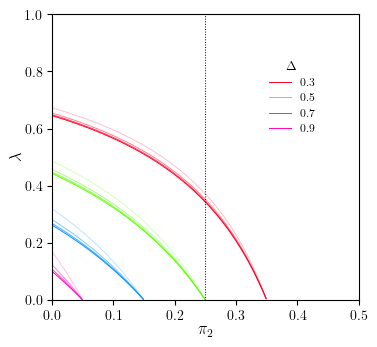

In [11]:
from subprocess import call
q_pairs_Delta = {
    0.1:[(9,10), (18,20), (27,30), (36,40)],
    0.2:[(8,10), (16,20), (24,30), (32,40)],
    0.3:[(7,10), (14,20), (21,30), (28,40)],
    0.4:[(6,10), (12,20), (18,30), (24,40)],
    0.5:[(5,10), (10,20), (15,30), (20,40)],
    0.6:[(4,10), (8,20), (12,30), (16,40)],
    0.7:[(3,10), (6,20), (9,30), (12,40)],
    0.8:[(2,10), (4,20), (6,30), (8,40)],
    0.9:[(1,10), (2,20), (3,30), (4,40)]
}

pi1 = 0.25
xlim, ylim = (0,0.5), (0,1)

fig, ax = plt.subplots(1,1,figsize=(3.7,3.4))
colors = plt.cm.gist_rainbow(np.linspace(0,1,len(Deltas)))
ax.set(xlabel=r'$\pi_2$', ylabel=r'$\lambda$', xlim=xlim, ylim=ylim)
ax.set_xlabel(r'$\pi_2$', labelpad=0.02)
ax.set_ylabel(r'$\lambda$', labelpad=0.02)
Deltas = [0.3, 0.5, 0.7, 0.9]
for Delta, color in zip(Deltas, colors):
    for i,q_pair in enumerate(q_pairs_Delta[Delta]):
        q1, q2 = q_pair
        if not os.path.exists(f'{path}/Tline_asym_fixPi1_pi1_{pi1}_q1_{float(q1)}_q2_{float(q2)}_f2_{int(x)}f1.csv'):
            call(f'python find_Tlines_asym_fixPi1.py {q1} {q2} {pi1} {x}', shell=True)
        tline = pd.read_csv(f'{path}/Tline_asym_fixPi1_pi1_{pi1}_q1_{float(q1)}_q2_{float(q2)}_f2_{int(x)}f1.csv')
        if i==len(q_pairs_Delta[Delta])-1:
            # ax.plot(tline['pi2'], tline['lambda'], color=color, label=f'{q_pairs_Delta[Delta][0]}', alpha=(i+1)/len(q_pairs_Delta[Delta]), lw=0.7)
            ax.plot(tline['pi2'], tline['lambda'], color=color, label=f'{Delta}', alpha=(i+1)/len(q_pairs_Delta[Delta]), lw=0.7)
        else:
            ax.plot(tline['pi2'], tline['lambda'], color=color, alpha=(i+1)/len(q_pairs_Delta[Delta]), lw=0.7)
# fig.legend(fontsize=8, loc=(0.7, 0.7))
fig.legend(fontsize=8, loc=(0.7,0.6), title=r'$\Delta$', title_fontsize=9, ncol=1, frameon=False)
ax.axvline(pi1, ls=':', color='xkcd:black', lw=0.7)
# fig.text(0.4, 0.96, rf'$\pi_1= {pi1}$', fontsize=9)
fig.tight_layout(pad=0.3)
# fig.savefig(f'Tlines_asym_pi2lam_pi1_{pi1}_manyDeltas_f2_{int(x)}f1.png')